In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy.ma as ma
import datetime as dt 
import pingouin
from sklearn.linear_model import LinearRegression
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2

In [5]:
data_1 = pd.read_excel("Regression 1.xlsx")
data_2 = pd.read_excel("Regression 2.xlsx")
data_3_1 = pd.read_excel("Regression 3-1.xlsx")
data_3_2 = pd.read_excel("Regression 3-2.xlsx")

[ 1.0509324  -0.13854211 -0.0031054   0.03553041 -0.11274258  0.0790428
  0.04992234]
coefficient of determination: 0.8344055679010356
intercept: 0.17145875852436054
Market Average Spread coefficients:  1.0509324032686134


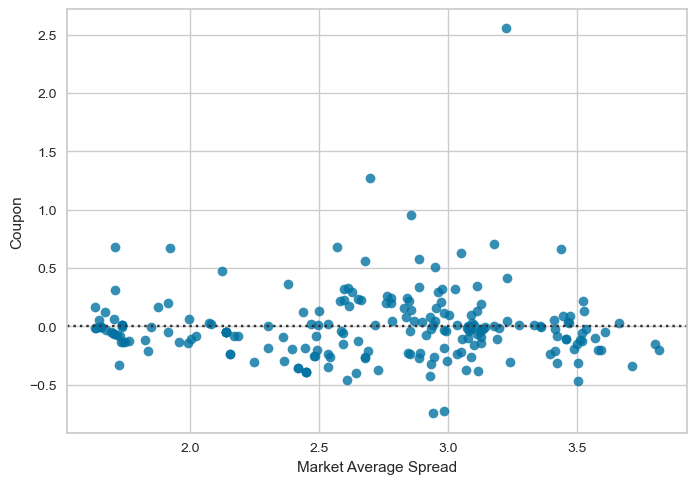

Rating coefficients:  -0.1385421059433006


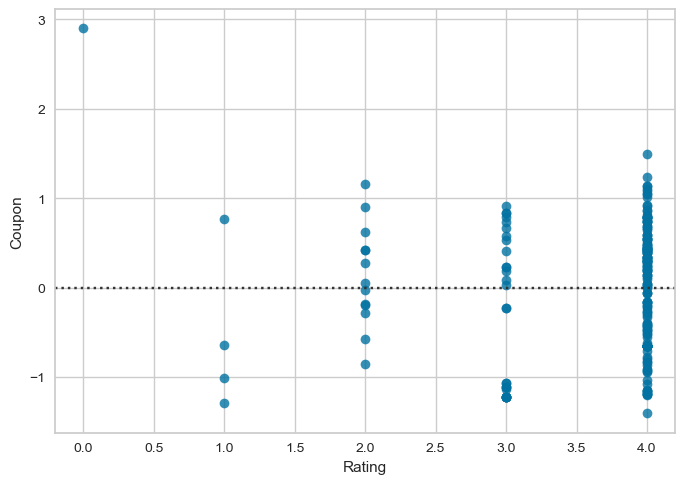

Issuing Amount coefficients:  -0.0031054049554687484


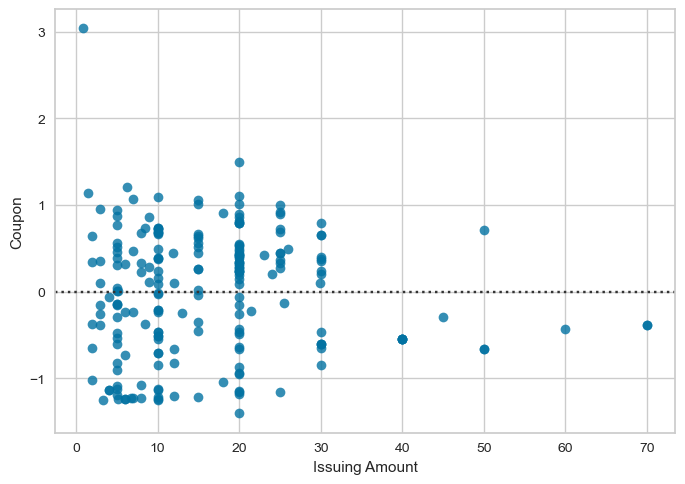

Tenor coefficients:  0.03553041446437939


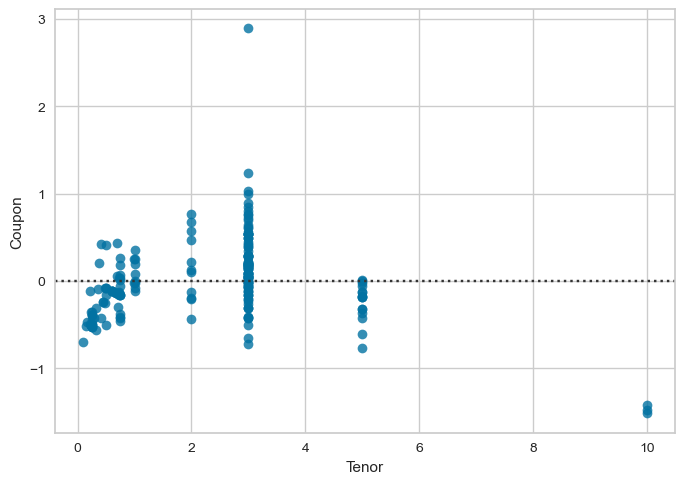

Green Indicator coefficients:  -0.11274257598327399


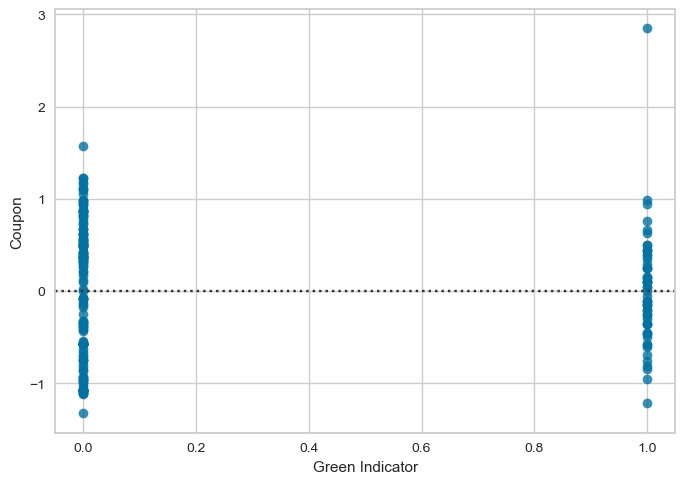

Russell ESG Score coefficients:  0.07904280212719719


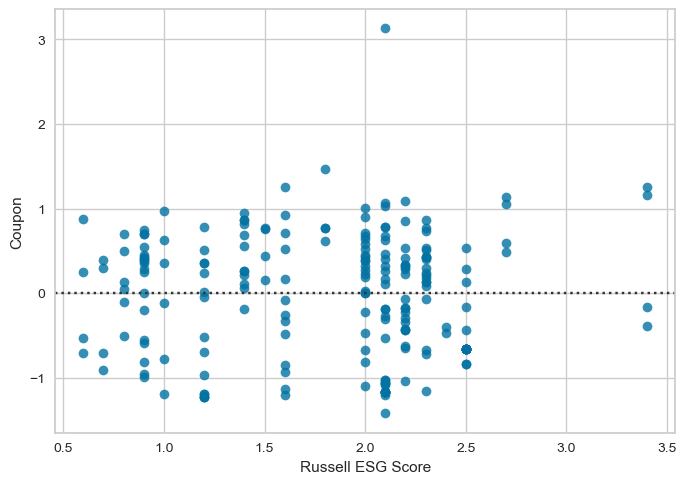

interaction coefficients:  0.0499223377821731


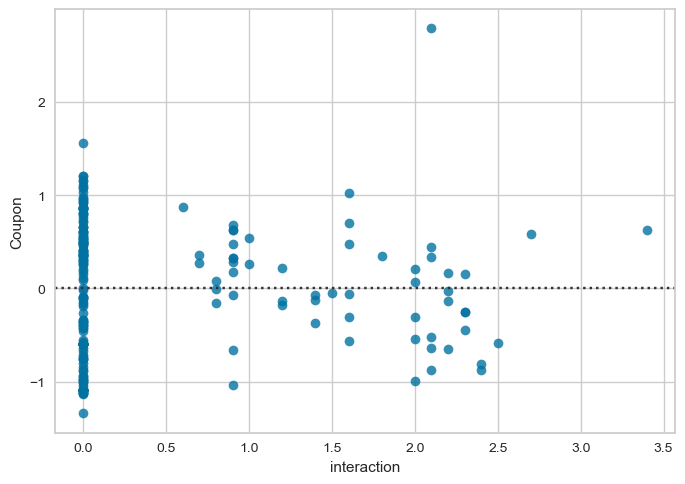

ValueError: Unknown label type: (0      3.67
1      3.47
2      3.21
3      3.18
4      3.35
       ... 
206    3.05
207    3.80
208    3.15
209    3.25
210    3.71
Name: Coupon, Length: 211, dtype: float64,)

In [50]:
#Model 1
X1 = data_1[["Market Average Spread", "Rating", "Issuing Amount", "Tenor", "Green Indicator", "Russell ESG Score", "interaction"]]
Y1 = data_1["Coupon"]
model1 = LinearRegression()
model1.fit(X1, Y1)
model1_pred =  model1.predict(X1)
print(model1.coef_)
factor1 = ["Market Average Spread", "Rating", "Issuing Amount", "Tenor", "Green Indicator", "Russell ESG Score", "interaction"]
# print("R^2: ", model1.score(Y1, X1))
r_sq = model1.score(X1, Y1)
print('coefficient of determination:', r_sq)
print(f"intercept: {model1.intercept_}")
for i in range(len(factor1)):
    print(factor1[i], "coefficients: ", model1.coef_[i])
    sns.residplot(x=factor1[i], y="Coupon", data=data_1)
    plt.show()
    


<AxesSubplot:>

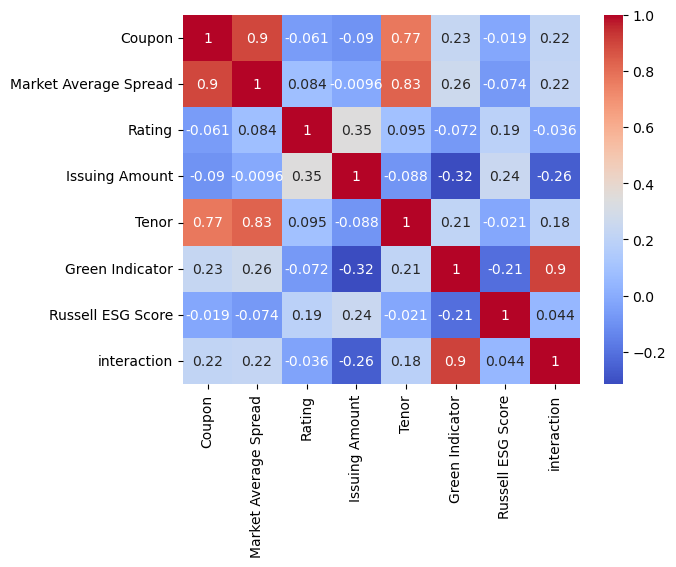

In [12]:
## Heatmaps
sns.heatmap(data_1.corr(), cmap='coolwarm', annot=True)

In [8]:
#Model 2
X2 = data_2[["overnight", "Refinitiv ESG Score", "rating", "Amount Issued (USD)", "Year", "interaction"]]
Y2 = data_2["Coupon"]
model2 = LinearRegression()
model2.fit(X2, Y2)
print(model2.coef_)

[ 1.56465237e+00 -7.80173557e-03 -1.56538331e-01  3.08719477e-10
  1.65489862e-04 -4.21504612e-03]


In [9]:
#Model 3_1
X3_1 = data_3_1[["Bloomberg ESG Score", "Credit Rating", "Risk free rate with same tenor", "Tenor", "Option"]]
Y3_1 = data_3_1["Coupon"]
model3_1 = LinearRegression()
model3_1.fit(X3_1, Y3_1)
print(model3_1.coef_)

[ 0.0070902  -0.15298547  1.06080732  0.03002172 -0.13407445]


In [11]:
#Model 3_2
X3_2 = data_3_2[["Market Average Spread", "Tenor", "Credit rating", "Issuer Type", "Russeel ESG Score"]]
Y3_2 = data_3_2["coupon"]
model3_2 = LinearRegression()
model3_2.fit(X3_2, Y3_2)
print(model3_2.coef_)

[ 1.68735235  0.05708612 -0.26213052 -0.24582459  0.04396345]
